In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df1=pd.read_csv("Part1 - Car name.csv")
df2=pd.read_json("Part1 - Car-Attributes.json")

In [3]:
dff=pd.concat([df1,df2],axis=1)

In [4]:
dff.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
dff.shape

(398, 9)

In [6]:
dff.to_csv("Unsuper_car_data.csv")

In [7]:
df=pd.read_csv("Unsuper_car_data.csv").reset_index(drop=True)

In [8]:
df.head()
df.columns

Index(['Unnamed: 0', 'car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr',
       'origin'],
      dtype='object')

In [9]:
df=df.drop(['Unnamed: 0','car_name'],axis=1)

In [10]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [11]:
df.shape

(398, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [13]:
df.isna().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [14]:
indexNames = df[ df['hp'] == '?'].index
df.drop(indexNames , inplace=True)
df['hp']=df['hp'].astype('int64')

In [15]:
df.shape

(392, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   disp    392 non-null    float64
 3   hp      392 non-null    int64  
 4   wt      392 non-null    int64  
 5   acc     392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


In [17]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [18]:
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
wt,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acc,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
yr,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [19]:
df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

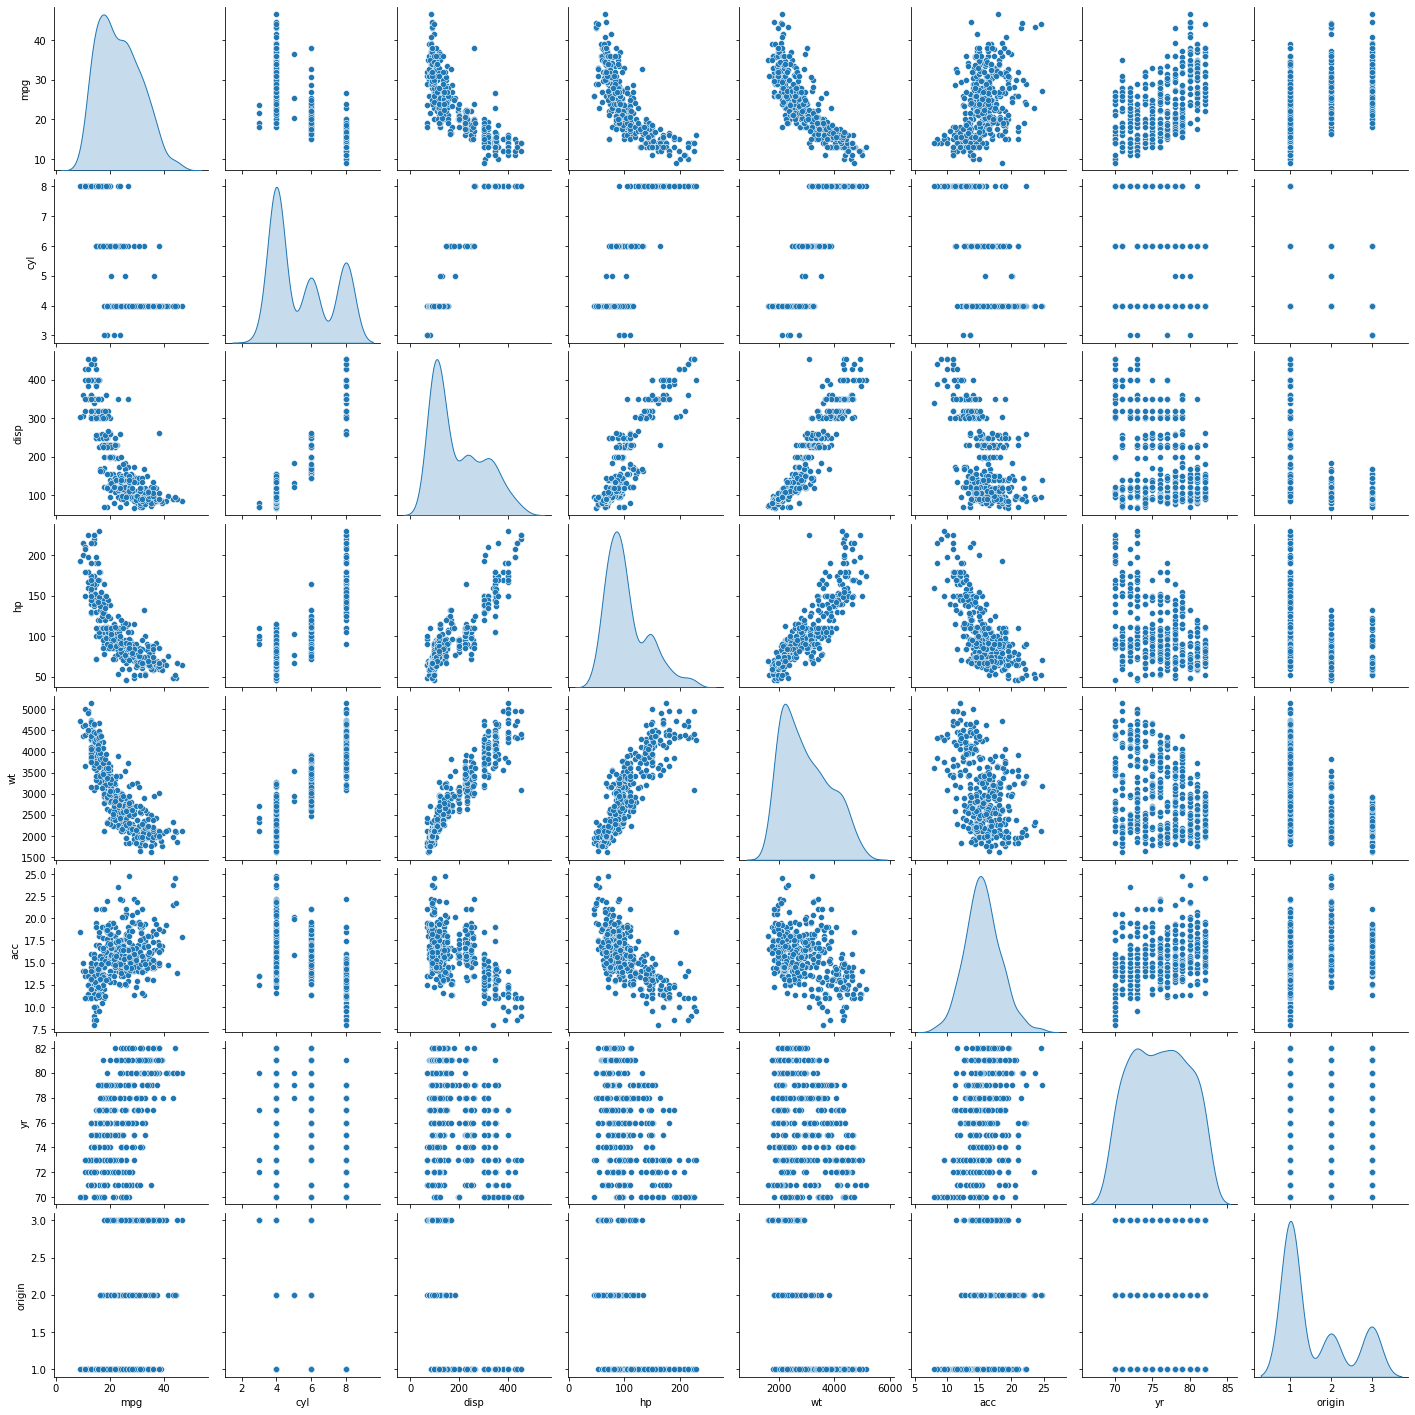

In [20]:
sns.pairplot(df,diag_kind="kde")

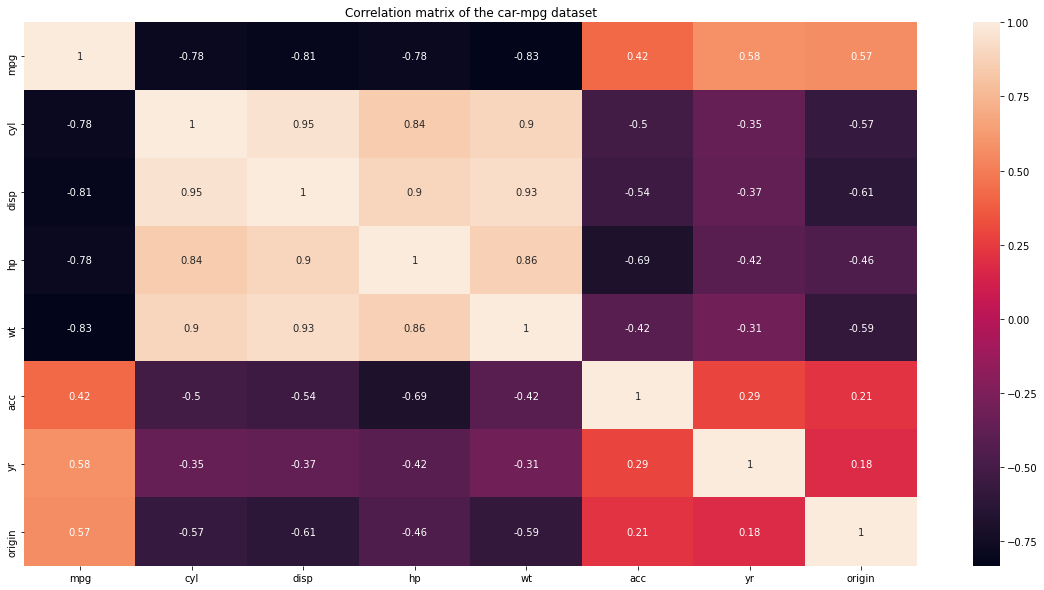

In [21]:
plt.figure(figsize=(20,10))
g=sns.heatmap(df.corr(),annot=True)
g.set(title='Correlation matrix of the car-mpg dataset')
plt.show()          

In [22]:
df['cyl'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cyl, dtype: int64

In [23]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)

In [24]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
meanDist=[]
clusters=range(1,10)

In [25]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDist.append(sum(np.min(cdist(df_scaled,model.cluster_centers_,"euclidean"),axis=1))/df_scaled.shape[0])

C:\Users\ZohaA3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


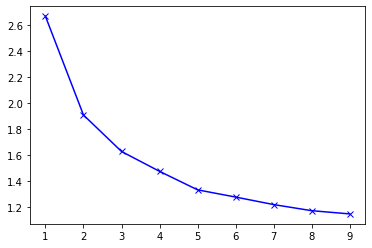

In [26]:
plt.plot(clusters,meanDist,'bx-')

In [27]:
model1=KMeans(2)
model1.fit(df_scaled)
prediction=model1.predict(df_scaled)
df_scaled['GROUP']=prediction
df['GROUP']=prediction
df_scaled.head()
df_clusters=df_scaled.groupby(['GROUP'])
df_clusters.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,0.676663,-0.772296,-0.758288,-0.621778,-0.719248,0.327518,0.328322,0.520833
1,-0.902217,1.029728,1.011051,0.829038,0.958997,-0.436690,-0.437763,-0.694444


In [28]:
from sklearn.model_selection import train_test_split
X=df.drop(['GROUP'],axis=1)
Y=df['GROUP']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

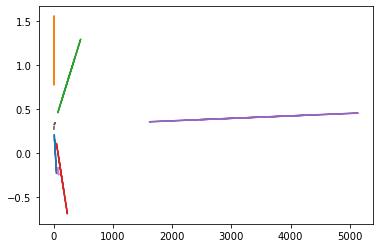

In [29]:
from sklearn.linear_model import LinearRegression
modelL1=LinearRegression()
modelL1.fit(X_train,Y_train)
y_pred=modelL1.predict(x_test)
b1=modelL1.coef_
b0=modelL1.intercept_
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))
print(modelL1.score(X_train,Y_train))
print(modelL1.score(x_test,y_test))

The Root Mean Sq Error is 0.20923728617694268 and R^2 error is 0.8246261297403827
0.8491848220778835
0.8246261297403827


In [31]:
model2=KMeans(3)
model2.fit(df_scaled)
prediction=model2.predict(df_scaled)
df_scaled['GROUP']=prediction
df['GROUP']=prediction
df_scaled.head()
df_clusters2=df_scaled.groupby(['GROUP'])
df_clusters2.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,-0.517510,0.435750,0.350659,-0.051540,0.353050,0.336699,-0.010632,-0.672247
1,0.711195,-0.822869,-0.791750,-0.641632,-0.749779,0.340470,0.304031,0.578659
2,-1.156649,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-0.716641


In [32]:
from sklearn.model_selection import train_test_split
X=df.drop(['GROUP'],axis=1)
Y=df['GROUP']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

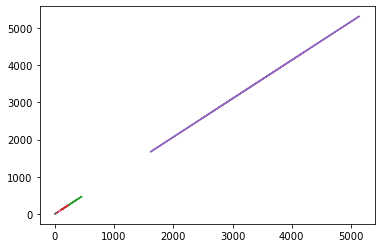

In [33]:
from sklearn.linear_model import LinearRegression
modelL2=LinearRegression()
modelL2.fit(X_train,Y_train)
y_pred=model.predict(x_test)
b0=modelL2.coef_
b1=modelL2.intercept_
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))
print(modelL2.score(X_train,Y_train))
print(modelL2.score(x_test,y_test))

The Root Mean Sq Error is 4.079898236507029 and R^2 error is -29.590400471142523
0.4202085531513262
0.47109955199585907


In [35]:
model3=KMeans(4)
model3.fit(df_scaled)
prediction=model3.predict(df_scaled)
df_scaled['GROUP']=prediction
df['GROUP']=prediction
df_scaled.head()
df_clusters2=df_scaled.groupby(['GROUP'])
df_clusters2.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,-1.156649,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-0.716641
1,0.224781,-0.841652,-0.813020,-0.538915,-0.759680,0.269816,-0.563960,0.680280
2,-0.517510,0.435750,0.350659,-0.051540,0.353050,0.336699,-0.010632,-0.672247
3,1.179760,-0.804776,-0.771259,-0.740580,-0.740241,0.408532,1.140169,0.480767


In [36]:
from sklearn.model_selection import train_test_split
X=df.drop(['GROUP'],axis=1)
Y=df['GROUP']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

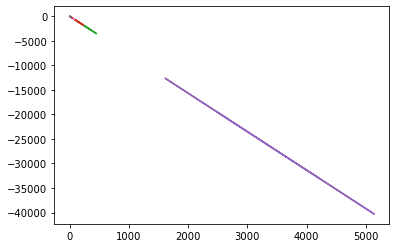

In [37]:
from sklearn.linear_model import LinearRegression
modelL3=LinearRegression()
modelL3.fit(X_train,Y_train)
y_pred=modelL3.predict(x_test)
b0=modelL3.coef_
b1=modelL3.intercept_
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))
print(modelL2.score(X_train,Y_train))
print(modelL2.score(x_test,y_test))

The Root Mean Sq Error is 0.5634585043713413 and R^2 error is 0.7690644616489399
-0.7354924224411559
-0.7961312354529324


In [39]:
import pandas as pd

In [40]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.stats import zscore


In [41]:
df1=pd.read_csv("Part1 - Car name.csv")
df2=pd.read_json("Part1 - Car-Attributes.json")
dff=pd.concat([df1,df2],axis=1)

In [42]:
dff.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [43]:
dff.drop(["car_name"],axis=1,inplace=True)

In [44]:
dff.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [45]:
indexNames = dff[ dff['hp'] == '?'].index
dff.drop(indexNames , inplace=True)
dff['hp']=dff['hp'].astype('int64')

In [46]:
dfs=dff.apply(zscore)

In [47]:
dfs.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


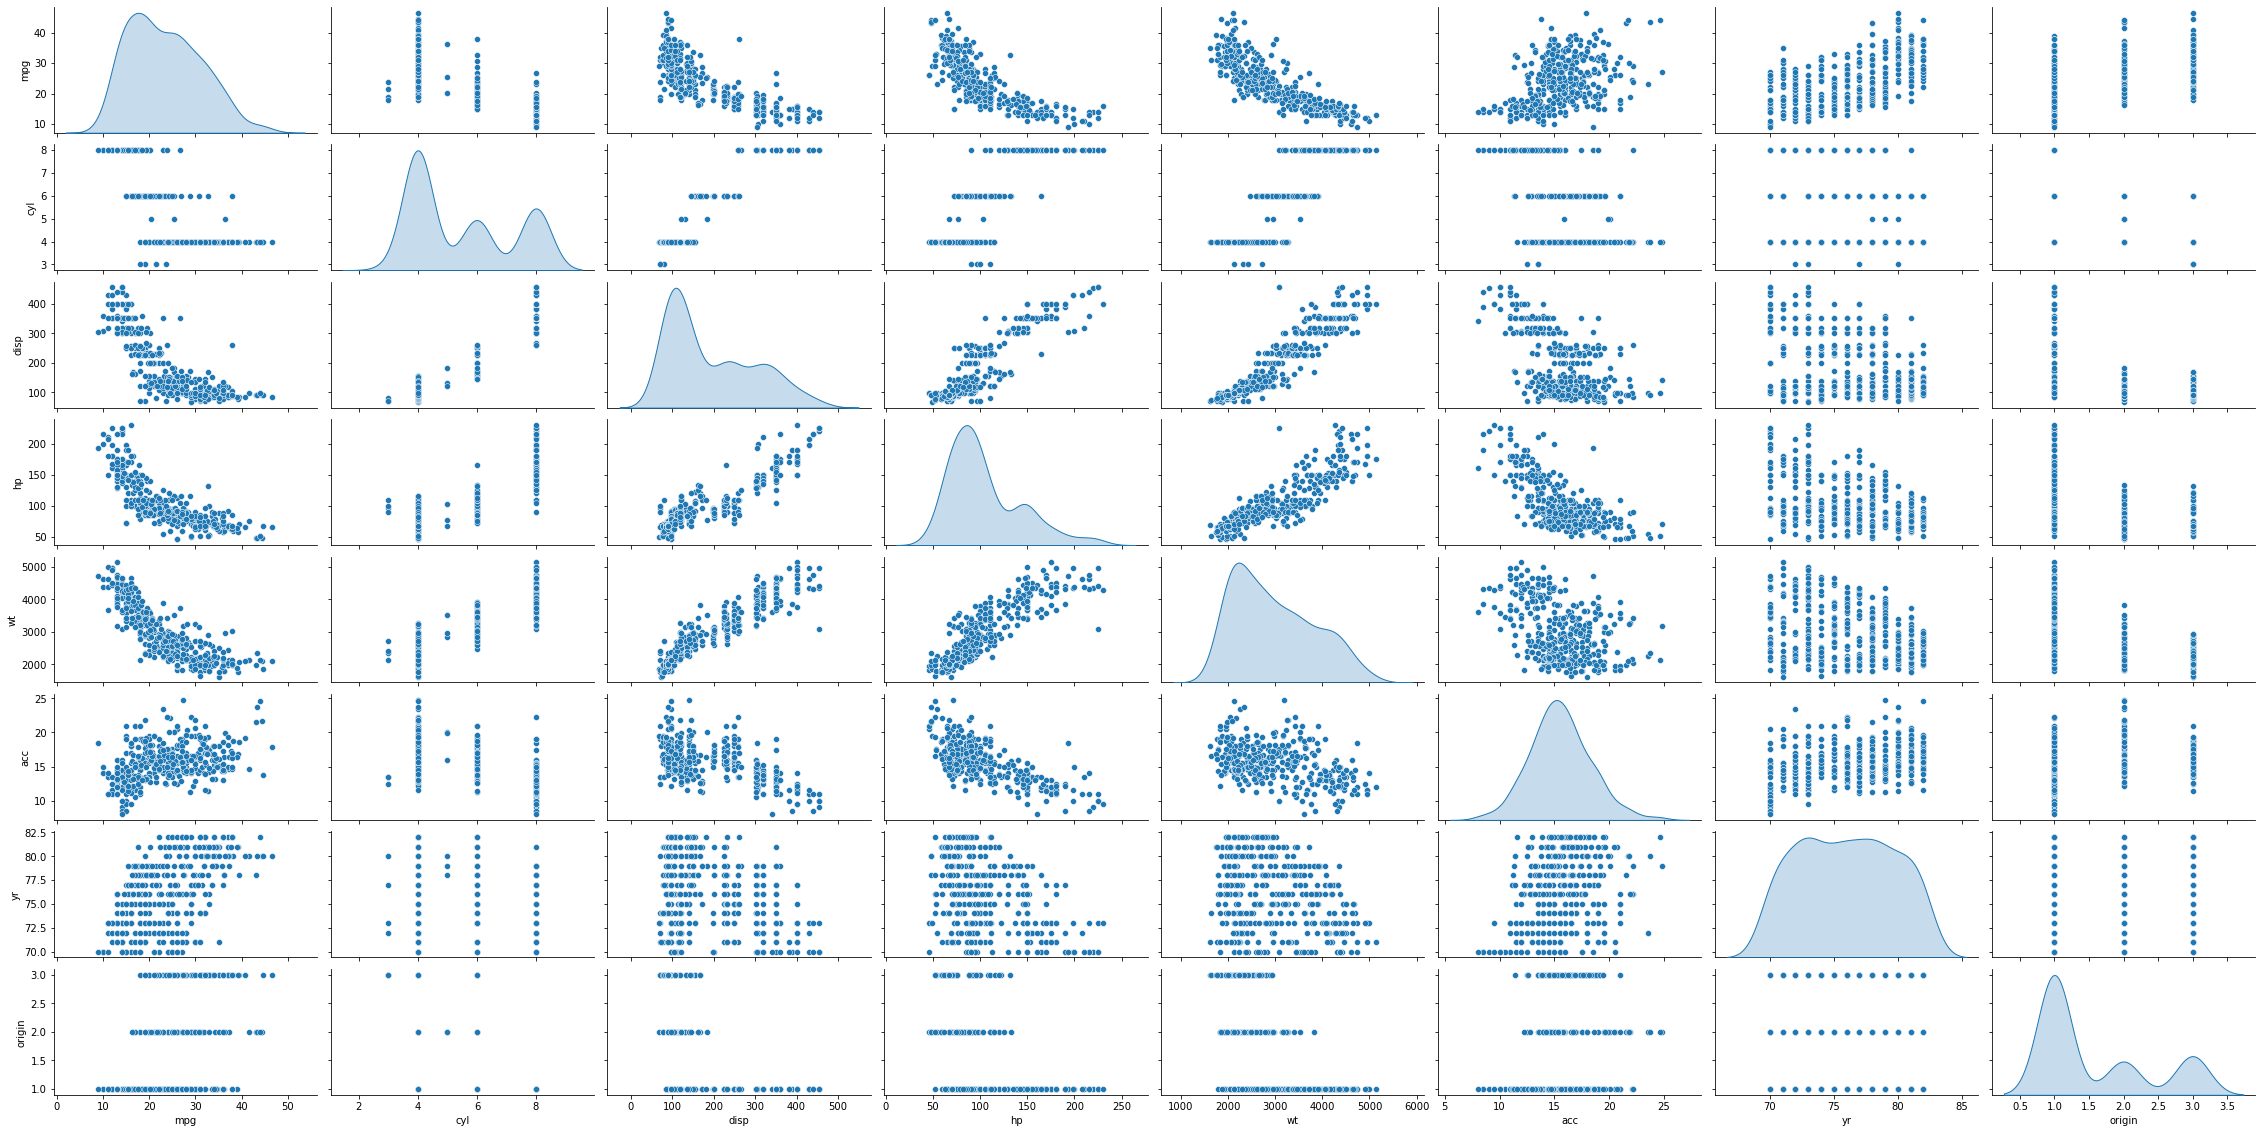

In [48]:
import seaborn as sns
sns.pairplot(dff, height=2,aspect=2 , diag_kind='kde')

In [49]:
from sklearn.cluster import AgglomerativeClustering 

In [50]:
model_1= AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [51]:
model_1.fit(dff)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [52]:
dff['labels'] = model_1.labels_
dff.head(10)


,mpg,cyl,disp,hp,wt,acc,yr,origin,labels
0,18.0,8,307.0,130,3504,12.0,70,1,2
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,2
3,16.0,8,304.0,150,3433,12.0,70,1,2
4,17.0,8,302.0,140,3449,10.5,70,1,2
5,15.0,8,429.0,198,4341,10.0,70,1,0
6,14.0,8,454.0,220,4354,9.0,70,1,0
7,14.0,8,440.0,215,4312,8.5,70,1,0
8,14.0,8,455.0,225,4425,10.0,70,1,0
9,15.0,8,390.0,190,3850,8.5,70,1,0


In [53]:
dff=dff.groupby(['labels'])

In [54]:
dff.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,14.615054,7.870968,343.344086,157.881720,4218.032258,13.394624,73.967742,1.010753
1,28.297826,4.252174,120.180435,81.756522,2362.965217,16.214348,76.821739,1.939130
2,19.175362,6.304348,241.115942,108.188406,3354.405797,16.191304,75.884058,1.130435


In [57]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering


In [58]:
Z = linkage(dfs, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfs))
c

0.6987370414272304

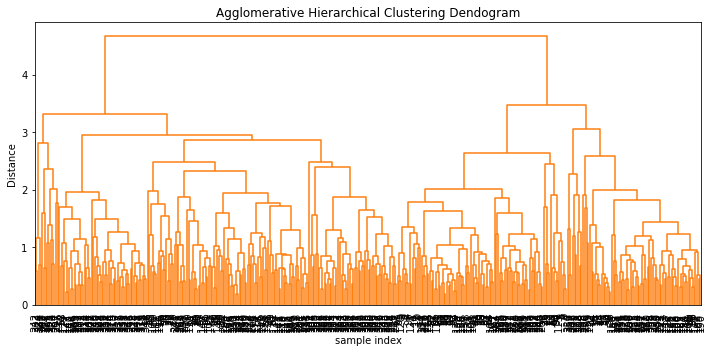

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [60]:
Z = linkage(dfs, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfs))
c

0.7385732265612737

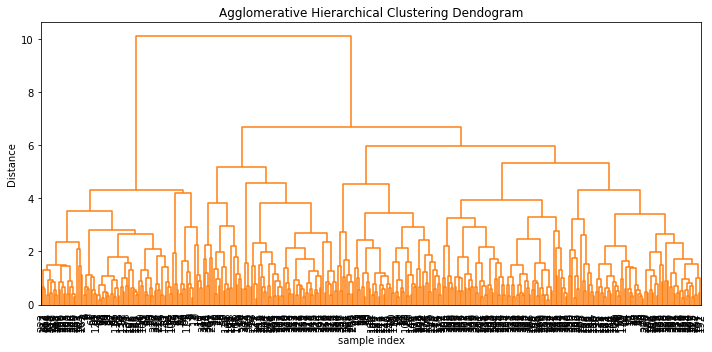

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()


In [62]:
Z = linkage(dfs, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfs))
c

0.6824190899807201

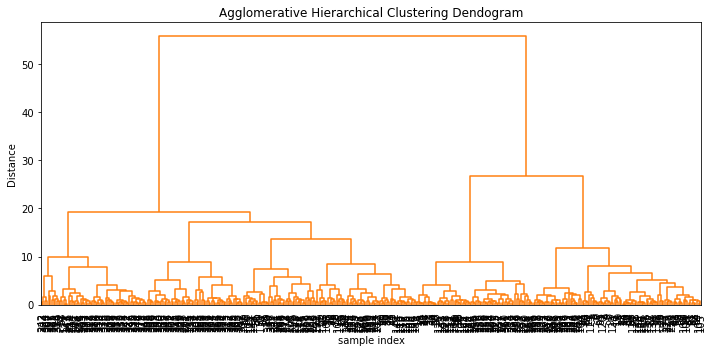

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()